In [536]:
# Import necessary packages
import os
import pandas as pd
import numpy as np 


In [537]:
# change working directory 
os.chdir(r"D:\Gabon_Lidar\DATA\email_122620")
os.getcwd()

'D:\\Gabon_Lidar\\DATA\\email_122620'

In [538]:
#Shot level 

In [563]:
def calc_agbd_footprint(laser_range):
    """
    input: laser_range - int
    output: L2 with extra column 'agbd'
    """
    #getting data
    datadir = r'D:/Gabon_Lidar/DATA/email_122620/'
    lasershot= pd.read_csv(datadir+'L2_Shot_List.csv',usecols=['SHOTNUMBER'])
    L2all = pd.read_csv(datadir+'LVIS2_withPlots.csv')
    L2 = L2all.loc[L2all['SHOTNUMBER'].isin(lasershot['SHOTNUMBER'].tolist())]
    tree = pd.read_csv(datadir+'Mondah_Tree_Data.csv')

    #looping through each lasershot
    agbs = []

    for i in range(len(L2)):
        las_x = L2.iloc[i]['X']
        las_y = L2.iloc[i]['Y']
        agbs.append(tree['m_agb'][(tree.x-las_x)**2+(tree.y-las_y)**2 <= laser_range**2].sum()/(np.pi*laser_range**2))
    
    #set new column in L2 dataframe to this new list of calculated agbs
    L2['agbd'] = agbs
    return L2

In [564]:
L2_tosave = calc_agbd_footprint(12.5)

<ipython-input-563-da6f7c0640e1>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  L2['agbd'] = agbs


In [569]:
L2_tosave.to_csv('L2_w_agbd_ShotLevel.csv')

In [570]:
footprint = pd.read_csv(datadir+'LVIS2_withPlots.csv')
footprint.to_csv(datadir +'footprint.csv')


In [673]:
# Import necessary packages
import os
import pandas as pd
import numpy as np 
import matplotlib.pyplot 

In [674]:

datadir = r'D:/Gabon_Lidar/DATA/email_122620/'
tree = pd.read_csv(datadir+'Mondah_Tree_Data.csv')

In [675]:
tree['subplot_0625'] =tree['subplot']

In [676]:
tree.loc[(tree['subplot'] == 1)|(tree['subplot'] == 2)| (tree['subplot'] == 7)| (tree['subplot'] == 8), 'subplot25'] = '1.2'
tree.loc[(tree['subplot'] == 4)|(tree['subplot'] == 5)| (tree['subplot'] == 3)| (tree['subplot'] == 6), 'subplot25'] = '1.1'
tree.loc[(tree['subplot'] == 12)|(tree['subplot'] == 13)| (tree['subplot'] == 11)| (tree['subplot'] == 14), 'subplot25'] = '2.1'
tree.loc[(tree['subplot'] == 9)|(tree['subplot'] == 10)| (tree['subplot'] == 15)| (tree['subplot'] == 16), 'subplot25'] = '2.2'

In [677]:
tree['ID_subplot25'] = tree['plot'] + tree['subplot25']

In [678]:
tree['subplot_0625']=  tree['subplot_0625'].astype(str)

In [679]:
tree['ID_subplot_0625'] = tree['plot'] + tree['subplot_0625']

In [680]:
#Cleaning the Tree DATA for Plot Subplots 

In [681]:
# Import necessary packages
import os
import pandas as pd
import numpy as np 


In [682]:
datadir = r'D:/Gabon_Lidar/DATA/email_122620/'
tree = pd.read_csv(datadir+'Mondah_Tree_Data.csv')

In [683]:
tree.head()

,OID_,OID1,plot,subplot,tree_date,family,species,wsg,tree,stem,...,y,status,allom_key,a_stem,h_t,h_t_mod,d_stem,d_stem_val,d_ht,m_agb
0,NaN,NaN,NASA02,10,2/5/2016 0:00,Irvingiaceae,Klainedoxa sp.,0.917792,6808,1,...,60938.5731,1,2,3.092,34.0,49.06,1.984,1,1.6,59044.31
1,NaN,NaN,NASA02,15,2/5/2016 0:00,Vochysiaceae,Erismadelphus exsul,0.607100,6981,1,...,60940.9055,1,2,1.732,-9999.0,42.50,1.485,1,3.6,27862.05
2,NaN,NaN,NASA13,11,2/4/2016 0:00,Irvingiaceae,Klainedoxa trillesii,0.917792,5276,1,...,63758.0291,1,2,1.148,-9999.0,38.39,1.209,1,2.0,25276.37
3,NaN,NaN,NASA20,6,2/12/2016 0:00,Humiriaceae,Sacoglottis gabonensis,0.796333,4154,1,...,63353.7130,1,2,1.148,-9999.0,38.39,1.209,1,2.1,22006.20
4,NaN,NaN,NASA22,12,2/19/2016 0:00,Ctenolophonaceae,Ctenolophon englerianus,0.795000,8152,1,...,64740.9104,1,2,1.082,-9999.0,37.83,1.174,1,1.6,20453.35


In [684]:

datadir = r'D:/Gabon_Lidar/DATA/email_122620/'
tree = pd.read_csv(datadir+'Mondah_Tree_Data.csv')
#Creating the .25 hec plots 
tree.loc[(tree['subplot'] == 1)|(tree['subplot'] == 2)| (tree['subplot'] == 7)| (tree['subplot'] == 8), 'subplot25'] = '1.2'
tree.loc[(tree['subplot'] == 4)|(tree['subplot'] == 5)| (tree['subplot'] == 3)| (tree['subplot'] == 6), 'subplot25'] = '1.1'
tree.loc[(tree['subplot'] == 12)|(tree['subplot'] == 13)| (tree['subplot'] == 11)| (tree['subplot'] == 14), 'subplot25'] = '2.1'
tree.loc[(tree['subplot'] == 9)|(tree['subplot'] == 10)| (tree['subplot'] == 15)| (tree['subplot'] == 16), 'subplot25'] = '2.2'
#Create unqure id for subplot25 and 0625 
tree['ID_subplot25'] = tree['plot'] + tree['subplot25']

tree['subplot_0625'] =  tree['subplot']
tree['subplot_0625'] =  tree['subplot'].astype(int)

In [685]:
tree['subplot_0625'] =  tree['subplot']*10

In [686]:
tree['subplot_0625'] =  tree['subplot'].astype(str)
tree['ID_subplot_0625'] = tree['plot'] + tree['subplot_0625']
#Filter for -9999
tree = tree[(tree.m_agb >= 0)]
#Create subplot tables 
tree_plot = tree 
tree_plot25 = tree 
tree_plot625 = tree

In [687]:
tree_plot625

,OID_,OID1,plot,subplot,tree_date,family,species,wsg,tree,stem,...,h_t,h_t_mod,d_stem,d_stem_val,d_ht,m_agb,subplot25,ID_subplot25,subplot_0625,ID_subplot_0625
0,NaN,NaN,NASA02,10,2/5/2016 0:00,Irvingiaceae,Klainedoxa sp.,0.917792,6808,1,...,34.0,49.06,1.984,1,1.6,59044.31,2.2,NASA022.2,10,NASA0210
1,NaN,NaN,NASA02,15,2/5/2016 0:00,Vochysiaceae,Erismadelphus exsul,0.607100,6981,1,...,-9999.0,42.50,1.485,1,3.6,27862.05,2.2,NASA022.2,15,NASA0215
2,NaN,NaN,NASA13,11,2/4/2016 0:00,Irvingiaceae,Klainedoxa trillesii,0.917792,5276,1,...,-9999.0,38.39,1.209,1,2.0,25276.37,2.1,NASA132.1,11,NASA1311
3,NaN,NaN,NASA20,6,2/12/2016 0:00,Humiriaceae,Sacoglottis gabonensis,0.796333,4154,1,...,-9999.0,38.39,1.209,1,2.1,22006.20,1.1,NASA201.1,6,NASA206
4,NaN,NaN,NASA22,12,2/19/2016 0:00,Ctenolophonaceae,Ctenolophon englerianus,0.795000,8152,1,...,-9999.0,37.83,1.174,1,1.6,20453.35,2.1,NASA222.1,12,NASA2212
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6640,NaN,NaN,NASA21,4,2/24/2016 0:00,Annonaceae,Cleistopholis sp.,0.322350,101878,1,...,-9999.0,7.93,0.050,1,1.3,3.89,1.1,NASA211.1,4,NASA214
6641,NaN,NaN,NASA21,9,2/24/2016 0:00,Annonaceae,Cleistopholis sp.,0.322350,101889,1,...,-9999.0,7.93,0.050,1,1.3,3.89,2.2,NASA212.2,9,NASA219
6642,NaN,NaN,NASA14,12,2/1/2016 0:00,Urticaceae,Musanga cecropioides,0.242833,101397,1,...,-9999.0,8.16,0.053,1,1.3,3.40,2.1,NASA142.1,12,NASA1412
6643,NaN,NaN,NASA20,1,2/12/2016 0:00,Urticaceae,Musanga cecropioides,0.242833,101605,1,...,-9999.0,7.93,0.050,1,1.3,2.95,1.2,NASA201.2,1,NASA201


In [688]:
datadir = r'D:/Gabon_Lidar/DATA/email_122620/'
L2all = pd.read_csv(datadir+'LVIS2_withPlots.csv')
#Create unqure id for subplot25 and 0625 
L2all['subplot025'] =   L2all['subplot025'].astype(str)
L2all['ID_subplot25'] =L2all['plot'] + L2all['subplot025']

L2all = L2all[(L2all.subplot625 >= 0)]
L2all['subplot625'] =   L2all['subplot625'].astype(int)


In [689]:
L2all['subplot625'] =   L2all['subplot625'].astype(str)
L2all['ID_subplot625'] = L2all['plot'] + L2all['subplot625']


# remove special character 
L2all.ID_subplot625 = L2all.ID_subplot625.str.replace('.', '') 
#Create subplot tables 
L2all_plot = L2all
L2all_plot25 = L2all 
L2all_plot625 = L2all

In [690]:
L2all_plot625

,OID_,Join_Count,TARGET_FID,Join_Count_1,TARGET_FID_1,LFID,SHOTNUMBER,TIME,GLON,GLAT,...,CHANNEL_RH,X,Y,plot,subplot625,subplot025,bio_mass_index,agbd,ID_subplot25,ID_subplot625
0,1.0,1.0,1.0,1.0,1.0,1.657455e+09,9361768.0,45679.155,9.422531,0.582776,...,1.0,547015.0,64416.0,NASA14,13,2.1,181.659256,3.958614,NASA142.1,NASA1413
1,2.0,1.0,2.0,1.0,2.0,1.657455e+09,9361769.0,45679.156,9.422529,0.582682,...,1.0,547015.0,64406.0,NASA14,13,2.1,94.802843,3.390362,NASA142.1,NASA1413
2,3.0,1.0,3.0,1.0,3.0,1.657455e+09,9361773.0,45679.160,9.422520,0.582305,...,1.0,547014.0,64364.0,NASA14,15,2.2,43.625253,4.444115,NASA142.2,NASA1415
3,4.0,1.0,4.0,1.0,4.0,1.657455e+09,9361774.0,45679.161,9.422518,0.582210,...,1.0,547014.0,64353.0,NASA14,15,2.2,18.686456,3.799265,NASA142.2,NASA1415
4,5.0,1.0,5.0,1.0,5.0,1.657455e+09,9361775.0,45679.162,9.422515,0.582116,...,1.0,547013.0,64343.0,NASA14,16,2.2,-0.139962,0.810697,NASA142.2,NASA1416
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
639,640.0,1.0,640.0,1.0,640.0,1.657455e+09,9911421.0,46228.812,9.330292,0.546591,...,1.0,536752.0,60416.0,NASA09,13,2.1,1.878062,0.061014,NASA092.1,NASA0913
640,641.0,1.0,641.0,1.0,641.0,1.657455e+09,9911422.0,46228.813,9.330293,0.546496,...,1.0,536752.0,60405.0,NASA09,14,2.1,-0.784101,0.055269,NASA092.1,NASA0914
641,642.0,1.0,642.0,1.0,642.0,1.657455e+09,9911424.0,46228.815,9.330295,0.546308,...,1.0,536752.0,60384.0,NASA09,14,2.1,2.095619,0.118646,NASA092.1,NASA0914
642,643.0,1.0,643.0,1.0,643.0,1.657455e+09,9911425.0,46228.816,9.330296,0.546213,...,1.0,536752.0,60374.0,NASA09,15,2.2,-0.887688,NaN,NASA092.2,NASA0915


## Plot LEVEL 

In [691]:
sum = ['plot', 'm_agb']
tree = tree_plot[sum]
trees_plot_sum=  tree.groupby(by='plot').sum()
trees_plot_sum['agb_megagram'] = trees_plot_sum['m_agb']/10**6
trees_plot_sum['agb_megagram_hec'] = trees_plot_sum['agb_megagram']


In [692]:
trees_plot_sum.to_csv(datadir +'trees_plot_sum.csv')
trees_plot_sum = pd.read_csv(datadir + 'trees_plot_sum.csv')

In [693]:
trees_plot_sum

,plot,m_agb,agb_megagram,agb_megagram_hec
0,NASA01,25867.65,0.025868,0.025868
1,NASA02,268659.24,0.268659,0.268659
2,NASA03,48858.99,0.048859,0.048859
3,NASA05,86507.94,0.086508,0.086508
4,NASA09,3439.58,0.003440,0.003440
5,NASA10,99361.95,0.099362,0.099362
6,NASA11,31446.68,0.031447,0.031447
7,NASA13,230972.28,0.230972,0.230972
8,NASA14,147391.68,0.147392,0.147392
9,NASA19,5256.03,0.005256,0.005256


In [694]:
#Plot Shot data 

In [695]:
#L2all = pd.read_csv(datadir+'LVIS2_withPlots.csv')

In [696]:
sum = ['plot', 'RH10', 'RH15', 'RH20', 'RH25', 'RH30',
       'RH35', 'RH40', 'RH45', 'RH50', 'RH55', 'RH60', 'RH65', 'RH70', 'RH75',
       'RH80', 'RH85', 'RH90', 'RH95', 'RH96', 'RH97', 'RH98', 'RH99', 'RH100','bio_mass_index','agbd']
L2all = L2all[sum]
L2all_plot_sum= L2all.groupby(by='plot').sum()
L2all_plot_sum.to_csv(datadir +'L2all_plot_sum.csv')
L2all_plot_sum =pd.read_csv(datadir +'L2all_plot_sum.csv')

In [697]:
plot =  L2all_plot_sum.set_index('plot').join(trees_plot_sum.set_index('plot'))

In [698]:
#plot
plot.to_csv(datadir +'plot.csv')
plot =pd.read_csv(datadir +'plot.csv')

PermissionError: [Errno 13] Permission denied: 'D:/Gabon_Lidar/DATA/email_122620/plot.csv'

## subplot_0625 LEVEL 

In [699]:
tree_plot625.head(3)

,OID_,OID1,plot,subplot,tree_date,family,species,wsg,tree,stem,...,h_t,h_t_mod,d_stem,d_stem_val,d_ht,m_agb,subplot25,ID_subplot25,subplot_0625,ID_subplot_0625
0,NaN,NaN,NASA02,10,2/5/2016 0:00,Irvingiaceae,Klainedoxa sp.,0.917792,6808,1,...,34.0,49.06,1.984,1,1.6,59044.31,2.2,NASA022.2,10,NASA0210
1,NaN,NaN,NASA02,15,2/5/2016 0:00,Vochysiaceae,Erismadelphus exsul,0.607100,6981,1,...,-9999.0,42.50,1.485,1,3.6,27862.05,2.2,NASA022.2,15,NASA0215
2,NaN,NaN,NASA13,11,2/4/2016 0:00,Irvingiaceae,Klainedoxa trillesii,0.917792,5276,1,...,-9999.0,38.39,1.209,1,2.0,25276.37,2.1,NASA132.1,11,NASA1311


In [700]:
L2all_plot625.head(3)

,OID_,Join_Count,TARGET_FID,Join_Count_1,TARGET_FID_1,LFID,SHOTNUMBER,TIME,GLON,GLAT,...,CHANNEL_RH,X,Y,plot,subplot625,subplot025,bio_mass_index,agbd,ID_subplot25,ID_subplot625
0,1.0,1.0,1.0,1.0,1.0,1.657455e+09,9361768.0,45679.155,9.422531,0.582776,...,1.0,547015.0,64416.0,NASA14,13,2.1,181.659256,3.958614,NASA142.1,NASA1413
1,2.0,1.0,2.0,1.0,2.0,1.657455e+09,9361769.0,45679.156,9.422529,0.582682,...,1.0,547015.0,64406.0,NASA14,13,2.1,94.802843,3.390362,NASA142.1,NASA1413
2,3.0,1.0,3.0,1.0,3.0,1.657455e+09,9361773.0,45679.160,9.422520,0.582305,...,1.0,547014.0,64364.0,NASA14,15,2.2,43.625253,4.444115,NASA142.2,NASA1415


In [701]:
sum = ['ID_subplot_0625', 'm_agb']
trees_plot625_sum= tree_plot625[sum]
trees_plot625_sum= trees_plot625_sum.groupby(by='ID_subplot_0625').sum()
trees_plot625_sum['agb_megagram'] = trees_plot625_sum['m_agb']/10**6
trees_plot625_sum['agb_megagram_hec'] = trees_plot625_sum['agb_megagram'] * .0625

In [702]:
trees_plot625_sum.to_csv(datadir +'trees_plot625_sum.csv')
trees_plot625_sum = pd.read_csv(datadir + 'trees_plot625_sum.csv')

In [703]:
trees_plot625_sum

,ID_subplot_0625,m_agb,agb_megagram,agb_megagram_hec
0,NASA011,392.06,0.000392,0.000025
1,NASA0110,7019.15,0.007019,0.000439
2,NASA0111,2375.45,0.002375,0.000148
3,NASA0112,163.68,0.000164,0.000010
4,NASA0113,8050.57,0.008051,0.000503
...,...,...,...,...
223,NASA235,2038.78,0.002039,0.000127
224,NASA236,5864.78,0.005865,0.000367
225,NASA237,14554.34,0.014554,0.000910
226,NASA238,20313.10,0.020313,0.001270


In [704]:
L2all_plot625_sum

,ID_subplot625,RH10,RH15,RH20,RH25,RH30,RH35,RH40,RH45,RH50,...,RH85,RH90,RH95,RH96,RH97,RH98,RH99,RH100,bio_mass_index,agbd
0,NASA011,-1.12,1.86,4.19,6.05,7.70,9.19,10.54,11.66,12.71,...,19.29,20.56,22.57,23.18,23.92,24.89,26.31,30.05,1586.154130,0.313258
1,NASA0116,-3.20,-2.23,-1.48,-0.81,-0.07,0.53,1.20,2.03,2.85,...,11.89,15.18,19.97,22.29,24.38,26.39,28.86,32.14,0.548619,8.064638
2,NASA018,-3.06,-2.02,-1.20,-0.31,0.67,1.86,3.21,4.79,6.43,...,13.75,15.02,16.75,17.27,18.01,18.91,20.49,23.29,94.544525,0.444432
3,NASA019,-5.60,-4.64,-3.81,-3.07,-2.39,-1.87,-1.34,-0.82,-0.30,...,4.18,5.31,7.32,8.00,8.90,10.31,12.93,18.29,69.519013,0.413446
4,NASA021,-26.96,-19.69,-14.15,-9.50,-5.39,-1.93,1.44,4.89,8.41,...,43.40,53.15,71.27,80.41,91.27,99.88,110.38,126.05,3.426855,65.030496
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137,NASA235,-5.17,0.50,5.16,10.40,17.22,25.14,32.85,40.54,48.78,...,105.42,114.57,125.64,128.56,133.79,142.02,148.90,160.42,903.369313,24.355728
138,NASA236,20.65,27.31,32.32,36.58,40.40,43.76,46.83,50.05,52.60,...,74.89,80.72,87.02,88.59,90.37,92.70,96.82,107.89,816.703359,36.424348
139,NASA237,7.77,19.52,30.73,40.24,48.99,58.19,66.41,73.24,79.14,...,140.84,149.60,160.13,162.84,165.97,170.85,176.90,189.69,1595.434509,133.261896
140,NASA238,17.42,29.62,40.10,50.41,60.58,68.29,73.59,78.07,82.71,...,114.06,122.20,130.57,132.51,134.46,136.78,139.77,146.21,1896.149631,62.026384


In [705]:
sum = ['ID_subplot625', 'RH10', 'RH15', 'RH20', 'RH25', 'RH30',
       'RH35', 'RH40', 'RH45', 'RH50', 'RH55', 'RH60', 'RH65', 'RH70', 'RH75',
       'RH80', 'RH85', 'RH90', 'RH95', 'RH96', 'RH97', 'RH98', 'RH99', 'RH100','bio_mass_index','agbd']
L2all_plot625 = L2all_plot625[sum]
L2all_plot625_sum= L2all_plot625.groupby(by='ID_subplot625').sum()
L2all_plot625_sum.to_csv(datadir +'L2all_plot625_sum.csv')
L2all_plot625_sum =pd.read_csv(datadir +'L2all_plot625_sum.csv')

In [706]:
L2all_plot625_sum

,ID_subplot625,RH10,RH15,RH20,RH25,RH30,RH35,RH40,RH45,RH50,...,RH85,RH90,RH95,RH96,RH97,RH98,RH99,RH100,bio_mass_index,agbd
0,NASA011,-1.12,1.86,4.19,6.05,7.70,9.19,10.54,11.66,12.71,...,19.29,20.56,22.57,23.18,23.92,24.89,26.31,30.05,1586.154130,0.313258
1,NASA0116,-3.20,-2.23,-1.48,-0.81,-0.07,0.53,1.20,2.03,2.85,...,11.89,15.18,19.97,22.29,24.38,26.39,28.86,32.14,0.548619,8.064638
2,NASA018,-3.06,-2.02,-1.20,-0.31,0.67,1.86,3.21,4.79,6.43,...,13.75,15.02,16.75,17.27,18.01,18.91,20.49,23.29,94.544525,0.444432
3,NASA019,-5.60,-4.64,-3.81,-3.07,-2.39,-1.87,-1.34,-0.82,-0.30,...,4.18,5.31,7.32,8.00,8.90,10.31,12.93,18.29,69.519013,0.413446
4,NASA021,-26.96,-19.69,-14.15,-9.50,-5.39,-1.93,1.44,4.89,8.41,...,43.40,53.15,71.27,80.41,91.27,99.88,110.38,126.05,3.426855,65.030496
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137,NASA235,-5.17,0.50,5.16,10.40,17.22,25.14,32.85,40.54,48.78,...,105.42,114.57,125.64,128.56,133.79,142.02,148.90,160.42,903.369313,24.355728
138,NASA236,20.65,27.31,32.32,36.58,40.40,43.76,46.83,50.05,52.60,...,74.89,80.72,87.02,88.59,90.37,92.70,96.82,107.89,816.703359,36.424348
139,NASA237,7.77,19.52,30.73,40.24,48.99,58.19,66.41,73.24,79.14,...,140.84,149.60,160.13,162.84,165.97,170.85,176.90,189.69,1595.434509,133.261896
140,NASA238,17.42,29.62,40.10,50.41,60.58,68.29,73.59,78.07,82.71,...,114.06,122.20,130.57,132.51,134.46,136.78,139.77,146.21,1896.149631,62.026384


In [707]:
trees_plot625_sum

,ID_subplot_0625,m_agb,agb_megagram,agb_megagram_hec
0,NASA011,392.06,0.000392,0.000025
1,NASA0110,7019.15,0.007019,0.000439
2,NASA0111,2375.45,0.002375,0.000148
3,NASA0112,163.68,0.000164,0.000010
4,NASA0113,8050.57,0.008051,0.000503
...,...,...,...,...
223,NASA235,2038.78,0.002039,0.000127
224,NASA236,5864.78,0.005865,0.000367
225,NASA237,14554.34,0.014554,0.000910
226,NASA238,20313.10,0.020313,0.001270


In [708]:
subplot625 = L2all_plot625_sum.set_index('ID_subplot625').join(trees_plot625_sum.set_index('ID_subplot_0625'))

In [709]:
#subplot625
subplot625.to_csv(datadir +'subplot625.csv')
subplot625 =pd.read_csv(datadir +'subplot625.csv')

## subplot_25 LEVEL 

In [710]:
sum = ['ID_subplot25', 'm_agb']
tree_plot25 = tree_plot25[sum]
trees_plot25_sum =  tree_plot25.groupby(by='ID_subplot25').sum()
trees_plot25_sum['agb_megagram'] =trees_plot25_sum['m_agb']/10**6
trees_plot25_sum['agb_megagram_hec'] = trees_plot25_sum['agb_megagram'] * .25 

In [711]:
trees_plot25_sum.to_csv(datadir +'trees_plot25_sum.csv')
trees_plot25_sum = pd.read_csv(datadir + 'trees_plot25_sum.csv')

In [712]:
trees_plot25_sum

,ID_subplot25,m_agb,agb_megagram,agb_megagram_hec
0,NASA011.1,2034.13,0.002034,0.000509
1,NASA011.2,3608.18,0.003608,0.000902
2,NASA012.1,12337.52,0.012338,0.003084
3,NASA012.2,7887.82,0.007888,0.001972
4,NASA021.1,34073.64,0.034074,0.008518
5,NASA021.2,41280.37,0.041280,0.010320
6,NASA022.1,35621.85,0.035622,0.008905
7,NASA022.2,157683.38,0.157683,0.039421
8,NASA031.1,3658.93,0.003659,0.000915
9,NASA031.2,6848.20,0.006848,0.001712


In [713]:
L2all_plot25

,OID_,Join_Count,TARGET_FID,Join_Count_1,TARGET_FID_1,LFID,SHOTNUMBER,TIME,GLON,GLAT,...,CHANNEL_RH,X,Y,plot,subplot625,subplot025,bio_mass_index,agbd,ID_subplot25,ID_subplot625
0,1.0,1.0,1.0,1.0,1.0,1.657455e+09,9361768.0,45679.155,9.422531,0.582776,...,1.0,547015.0,64416.0,NASA14,13,2.1,181.659256,3.958614,NASA142.1,NASA1413
1,2.0,1.0,2.0,1.0,2.0,1.657455e+09,9361769.0,45679.156,9.422529,0.582682,...,1.0,547015.0,64406.0,NASA14,13,2.1,94.802843,3.390362,NASA142.1,NASA1413
2,3.0,1.0,3.0,1.0,3.0,1.657455e+09,9361773.0,45679.160,9.422520,0.582305,...,1.0,547014.0,64364.0,NASA14,15,2.2,43.625253,4.444115,NASA142.2,NASA1415
3,4.0,1.0,4.0,1.0,4.0,1.657455e+09,9361774.0,45679.161,9.422518,0.582210,...,1.0,547014.0,64353.0,NASA14,15,2.2,18.686456,3.799265,NASA142.2,NASA1415
4,5.0,1.0,5.0,1.0,5.0,1.657455e+09,9361775.0,45679.162,9.422515,0.582116,...,1.0,547013.0,64343.0,NASA14,16,2.2,-0.139962,0.810697,NASA142.2,NASA1416
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
639,640.0,1.0,640.0,1.0,640.0,1.657455e+09,9911421.0,46228.812,9.330292,0.546591,...,1.0,536752.0,60416.0,NASA09,13,2.1,1.878062,0.061014,NASA092.1,NASA0913
640,641.0,1.0,641.0,1.0,641.0,1.657455e+09,9911422.0,46228.813,9.330293,0.546496,...,1.0,536752.0,60405.0,NASA09,14,2.1,-0.784101,0.055269,NASA092.1,NASA0914
641,642.0,1.0,642.0,1.0,642.0,1.657455e+09,9911424.0,46228.815,9.330295,0.546308,...,1.0,536752.0,60384.0,NASA09,14,2.1,2.095619,0.118646,NASA092.1,NASA0914
642,643.0,1.0,643.0,1.0,643.0,1.657455e+09,9911425.0,46228.816,9.330296,0.546213,...,1.0,536752.0,60374.0,NASA09,15,2.2,-0.887688,NaN,NASA092.2,NASA0915


In [714]:
sum = ['ID_subplot25', 'RH10', 'RH15', 'RH20', 'RH25', 'RH30',
       'RH35', 'RH40', 'RH45', 'RH50', 'RH55', 'RH60', 'RH65', 'RH70', 'RH75',
       'RH80', 'RH85', 'RH90', 'RH95', 'RH96', 'RH97', 'RH98', 'RH99', 'RH100','bio_mass_index','agbd']
L2all_plot25  = L2all_plot25 [sum]
L2all_plot25_sum = L2all_plot25.groupby(by= 'ID_subplot25').sum()
L2all_plot25_sum.to_csv(datadir +'L2all_plot25_sum.csv')
L2all_plot25_sum =pd.read_csv(datadir +'L2all_plot25_sum.csv')

In [715]:
L2all_plot25_sum 

,ID_subplot25,RH10,RH15,RH20,RH25,RH30,RH35,RH40,RH45,RH50,...,RH85,RH90,RH95,RH96,RH97,RH98,RH99,RH100,bio_mass_index,agbd
0,NASA011.2,-4.18,-0.16,2.99,5.74,8.37,11.05,13.75,16.45,19.14,...,33.04,35.58,39.32,40.45,41.93,43.80,46.80,53.34,1680.698654,0.757690
1,NASA012.2,-8.80,-6.87,-5.29,-3.88,-2.46,-1.34,-0.14,1.21,2.55,...,16.07,20.49,27.29,30.29,33.28,36.70,41.79,50.43,70.067632,8.478085
2,NASA021.1,20.29,47.82,70.06,90.22,109.51,128.92,145.85,161.20,176.05,...,329.90,355.83,405.72,419.71,433.53,457.71,479.29,518.19,2746.332924,150.474281
3,NASA021.2,-14.96,13.66,34.70,52.45,68.34,83.48,98.85,115.56,130.86,...,282.87,313.22,362.20,379.58,399.38,418.04,439.83,477.68,3808.062549,306.878497
4,NASA022.1,46.11,79.35,105.35,127.96,148.05,168.63,191.50,216.29,239.65,...,442.44,475.11,513.24,524.42,540.09,575.14,606.13,648.24,8709.131241,202.469086
5,NASA022.2,179.98,236.24,289.38,333.48,376.80,419.28,467.31,506.44,536.56,...,680.16,706.18,743.96,753.41,765.02,778.71,795.05,824.34,10887.291349,1184.573119
6,NASA031.1,-44.82,-24.43,-10.26,1.37,11.03,19.78,27.52,35.15,42.59,...,108.34,121.78,144.81,155.45,166.59,178.98,197.03,238.70,479.385590,16.929930
7,NASA031.2,-41.17,-20.77,-5.23,6.89,17.01,25.87,33.88,41.37,48.26,...,102.29,120.58,145.82,151.98,159.56,169.59,184.67,220.02,321.627134,40.165880
8,NASA032.1,37.40,69.54,94.69,116.77,137.75,156.41,173.71,191.02,207.46,...,370.99,404.80,469.24,482.58,498.70,518.03,545.66,591.33,3473.929003,146.281656
9,NASA032.2,9.73,36.72,58.68,77.48,93.83,107.46,119.89,132.05,143.23,...,237.10,261.92,297.37,306.34,317.24,330.80,348.36,382.07,2200.707578,90.100623


In [716]:
subplot25 = L2all_plot25_sum.set_index('ID_subplot25').join(trees_plot25_sum.set_index('ID_subplot25'))

In [717]:
#subplot25
subplot25.to_csv(datadir +'subplot25.csv')
subplot25 =pd.read_csv(datadir +'subplot25.csv')

In [718]:
#LVIS DATA 

In [719]:
subplot25.columns

Index(['ID_subplot25', 'RH10', 'RH15', 'RH20', 'RH25', 'RH30', 'RH35', 'RH40',
       'RH45', 'RH50', 'RH55', 'RH60', 'RH65', 'RH70', 'RH75', 'RH80', 'RH85',
       'RH90', 'RH95', 'RH96', 'RH97', 'RH98', 'RH99', 'RH100',
       'bio_mass_index', 'agbd', 'm_agb', 'agb_megagram', 'agb_megagram_hec'],
      dtype='object')

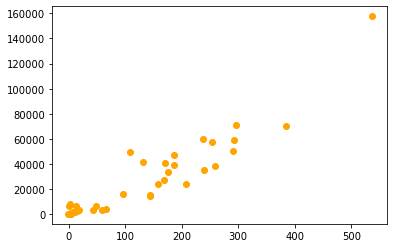

In [720]:
matplotlib.pyplot.scatter(subplot25.RH50,subplot25.m_agb,color='orange') 

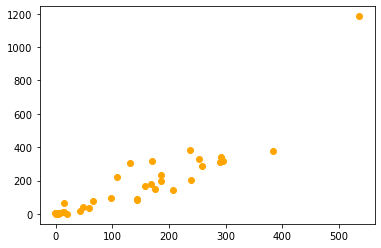

In [721]:
matplotlib.pyplot.scatter(subplot25.RH50,subplot25.agbd,color='orange') 

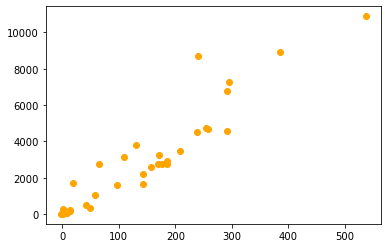

In [722]:
matplotlib.pyplot.scatter(subplot25.RH50,subplot25.bio_mass_index,color='orange') 

In [ ]:
#Abg agbd 

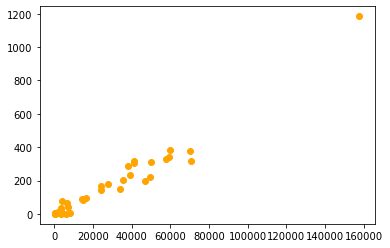

In [723]:
matplotlib.pyplot.scatter(subplot25.m_agb,subplot25.agbd,color='orange') 

In [ ]:
# abg Biomass Index 

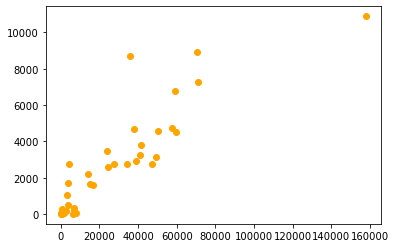

In [724]:
matplotlib.pyplot.scatter(subplot25.m_agb,subplot25.bio_mass_index,color='orange') 

In [ ]:
# agbd vs Biomass 


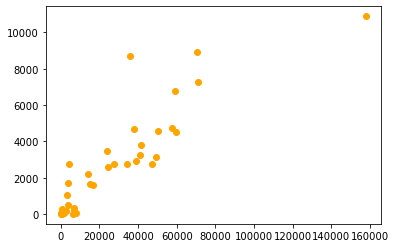

In [725]:
matplotlib.pyplot.scatter(subplot25.m_agb,subplot25.bio_mass_index,color='orange') 